In [ ]:
pip install kornia

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.7/705.7 kB 9.5 MB/s eta 0:00:00


In [ ]:
import kornia as K
import torch
import cv2
import numpy as np
from PIL import Image
from kornia.feature import LoFTR
import kornia.feature as KF
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from kornia.contrib import ImageStitcher

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_to_img = "drive/MyDrive/Colab Notebooks/"

In [ ]:
# Загрузим наши изображения
image_1 = transforms.PILToTensor()(Image.open(path_to_img + "mars1.jpg")).float().unsqueeze(dim=0)/255
image_2 = transforms.PILToTensor()(Image.open(path_to_img + "mars2.jpg")).float().unsqueeze(dim=0)/255

In [ ]:
images = [image_1, image_2]

Downloading: "http://cmp.felk.cvut.cz/~mishkdmy/models/loftr_outdoor.ckpt" to /root/.cache/torch/hub/checkpoints/loftr_outdoor.ckpt
100%|██████████| 44.2M/44.2M [00:04<00:00, 11.0MB/s]


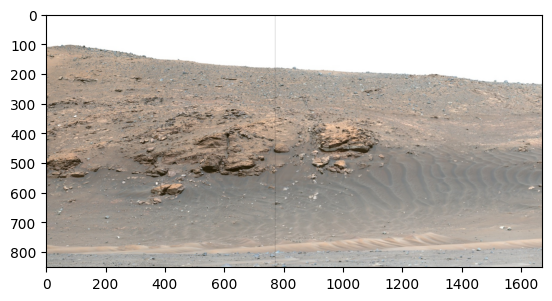

In [ ]:
IS = ImageStitcher(KF.LoFTR(pretrained="outdoor"), estimator="ransac")

with torch.no_grad():
    out = IS(*images)

plt.imshow(K.tensor_to_image(out))
plt.show()

In [ ]:
im_rgb = cv2.cvtColor(K.tensor_to_image(out), cv2.COLOR_BGR2RGB)*255
cv2.imwrite(path_to_img + "out_image2.jpg", im_rgb)

True